In [1]:
import warnings
warnings.filterwarnings('ignore')
# data wraggling and  pre-processing
import numpy as np
import pandas as pd
# data visualization
import seaborn as  sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

In [2]:
3.# Loading the Dataset
dt = pd.read_csv("C:/Users/adm/Documents/Datasets/heart_statlog_cleveland_hungary_final.csv")

In [3]:
dt.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
dt.shape

(1190, 12)

In [6]:
# Data cleaning and Preprocessing
# Renaming the features to proper  names
dt.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholestrol','fasting_blood_dugar','rest_ecg','max_heart_rate_achieved'
           ,'exercise_induced_angina','st_depression','st_slope','target']

In [7]:
# concerting features to  categorical variables
dt['chest_pain_type'][dt['chest_pain_type']==1]='typical angina'
dt['chest_pain_type'][dt['chest_pain_type']==2]='atypical anginal'
dt['chest_pain_type'][dt['chest_pain_type']==3]='non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type']==4]='asympomatic'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'


dt['st_slope'][dt['st_slope'] == 0] = 'normal'
dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')

In [8]:
dt['chest_pain_type'].value_counts()

asympomatic         625
non-anginal pain    283
atypical anginal    216
typical angina       66
Name: chest_pain_type, dtype: int64

In [9]:
dt['rest_ecg'].value_counts()

normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: rest_ecg, dtype: int64

In [22]:
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
normal           1
Name: st_slope, dtype: int64

In [10]:
dt.drop(dt[dt.st_slope=='normal'].index,inplace=True)

In [11]:
dt['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

In [15]:
# Checking for top 5  entries
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_dugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical anginal,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical anginal,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asympomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


In [16]:
# Checking for missing  values in the data
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholestrol                 0
fasting_blood_dugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

In [ ]:
`` There are no missing values in the data
```

In [12]:
dt.shape

(1189, 12)

In [13]:
dt.describe(include=[np.number])

,age,resting_blood_pressure,cholestrol,fasting_blood_dugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


[Text(0.5, 1.0, 'No. of heart Disease patients in dataset')]

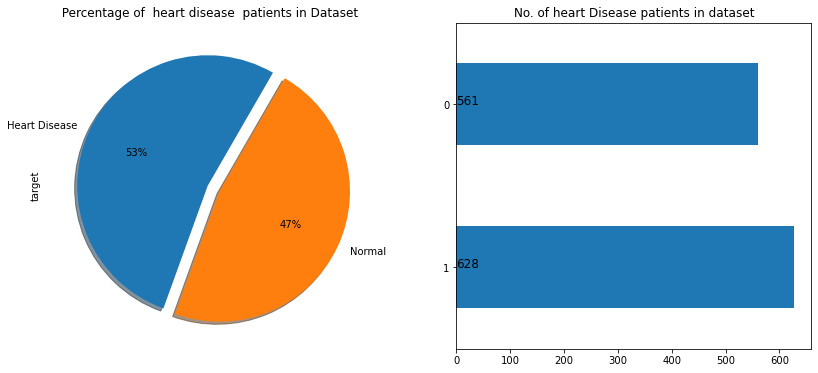

In [14]:
# Distribution of  Heart disease.(Target variable)
fig, (ax1,ax2)=plt.subplots(nrows=1,ncols=2,sharey=False,figsize=(14,6))
ax1 = dt['target'].value_counts().plot.pie(x='Heart Disease',y='no. of patients',autopct='%1.0f%%',
                                           labels=['Heart Disease','Normal'],startangle=60,ax=ax1,shadow=True,explode=(0,0.1))
ax1.set(title=" Percentage of  heart disease  patients in Dataset")

ax2= dt['target'].value_counts().plot(kind='barh',ax=ax2)
for i,j in enumerate(dt['target'].value_counts().values):ax2.text(.5,i,j,fontsize=12)
ax2.set(title='No. of heart Disease patients in dataset')
# The dataset is balanced having 629 heart disease patients and 561 normal patients


Text(0.5, 1.0, 'Age wise Distribution')

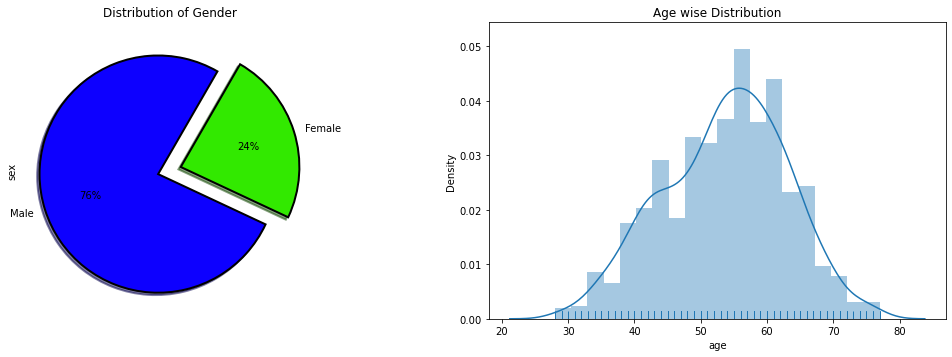

In [15]:
# Checking  Gender and  Age  wise  distribubution
plt.figure(figsize=(18,12))
plt.subplot(221)
dt['sex'].value_counts().plot.pie(autopct="%1.0f%%",colors=sns.color_palette('prism',5),
                                 startangle = 60 ,labels=['Male','Female'],wedgeprops={'linewidth':2,'edgecolor':'k'},
                                 explode=[.1,.1],shadow=True)
plt.title('Distribution of Gender')
plt.subplot(222)
ax=sns.distplot(dt['age'],rug=True)
plt.title('Age wise Distribution')

In [ ]:
From the  above plots it  can be seen that percentage of male is way too higher than female patients.
The average age of patientd is around 55.

Text(0.5, 1.0, 'GENDER DISTRIBUTION OF NORMAL PATIENTS')

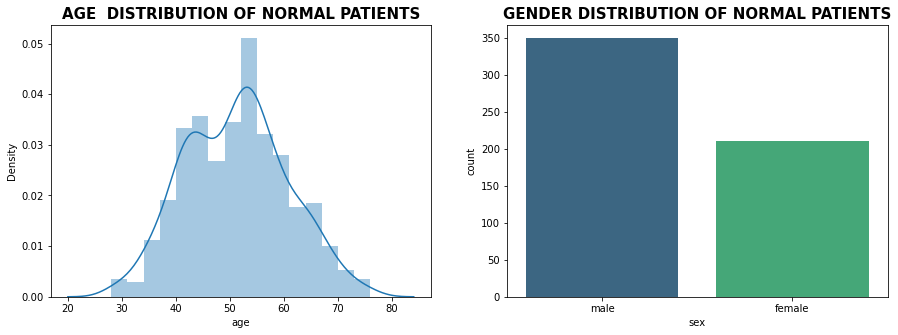

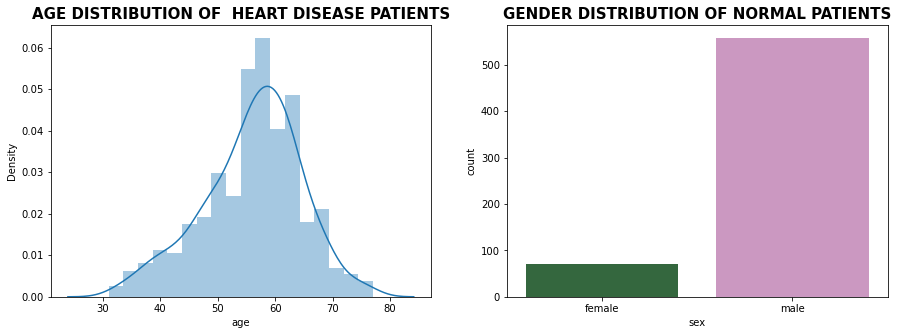

In [16]:
# Creating seperate df for normal and heart patients
attr_1=dt[dt['target']==1]
attr_0=dt[dt['target']==0]

# Plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE  DISTRIBUTION OF NORMAL PATIENTS',fontsize=15,weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'],palette='viridis')
plt.title("GENDER DISTRIBUTION OF NORMAL PATIENTS",fontsize=15,weight='bold')

# Plotting heart patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF  HEART DISEASE PATIENTS',fontsize=15,weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'],palette='cubehelix')
plt.title("GENDER DISTRIBUTION OF NORMAL PATIENTS",fontsize=15,weight='bold')


In [ ]:
From the above plots more males account for heart disease in comparision to females whereas mean age of heart  disease
patients is around 58 to 60 years


Text(0.5, 1.0, 'CHEST PAIN OF HEART PATIENTS')

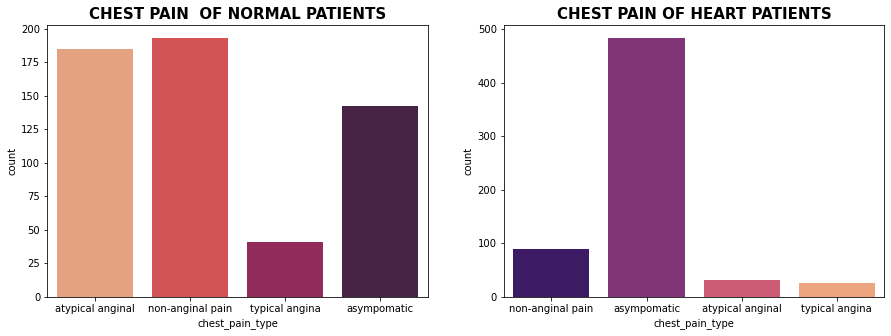

In [8]:
## Distribution of chest pain type
# plotting normal patients
from matplotlib.ticker import PercentFormatter
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'],palette='rocket_r')
plt.title('CHEST PAIN  OF NORMAL PATIENTS',fontsize=15,weight='bold')

# Plotting heart patients
ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'],palette='magma')
plt.title('CHEST PAIN OF HEART PATIENTS',fontsize = 15,weight='bold')

In [81]:
# E xploring heart disease patients based on chest pain type
plot_criteria=['chest_pain_type','target']
cm=sns.light_palette('red',as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]],dt[plot_criteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

target,0,1
chest_pain_type,,
asympomatic,25.310000,76.910000
atypical anginal,32.980000,4.940000
non-anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


In [ ]:
we can see that 76% of the chest pain type of heart disease patients have asymptomatic  chest pain


Text(0.5, 1.0, 'REST ECG OF HEART PATIENTS')

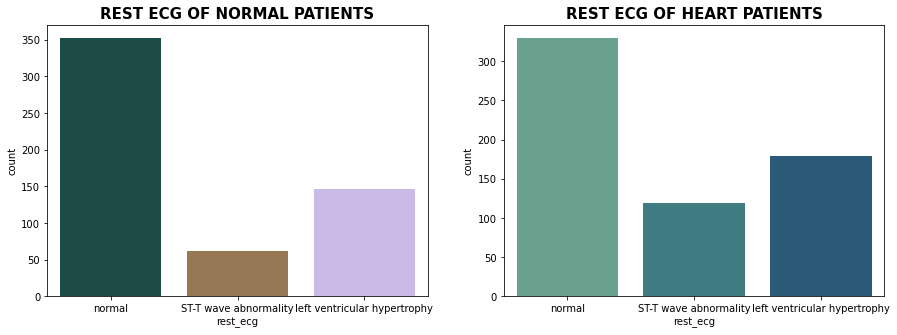

In [12]:
# Distribution of Rest ECG
# plotting normal patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['rest_ecg'],palette='cubehelix')
plt.title('REST ECG OF NORMAL PATIENTS',fontsize = 15,weight='bold')
# plotting heart patients
ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['rest_ecg'],palette='crest')
plt.title('REST ECG OF HEART PATIENTS',fontsize = 15,weight='bold')

In [16]:
# Eploring Heart Disease patients based on REST ECG
plot_creteria=['rest_ecg','target']
cm=sns.light_palette('red',as_cmap=True)
(round(pd.crosstab(dt[plot_creteria[0]],[plot_creteria[1]],normalize='columns')*100,2)).style.background_gradient(cmap=cm)

col_0,target
rest_ecg,
ST-T wave abnormality,15.220000
left ventricular hypertrophy,27.330000
normal,57.440000


Text(0.5, 1.0, 'ST SLOPE OF HEART PATIENTS')

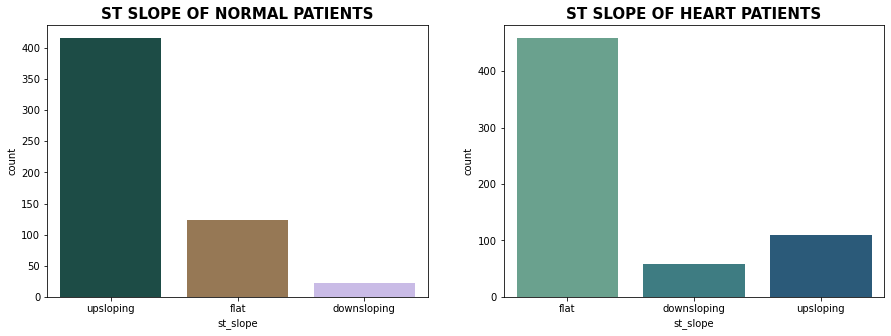

In [19]:
# distribution of  st_slope
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'],palette='cubehelix')
plt.title('ST SLOPE OF NORMAL PATIENTS',fontsize = 15,weight='bold')

# plotting heart patients
ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'],palette='crest')
plt.title('ST SLOPE OF HEART PATIENTS',fontsize = 15,weight='bold')

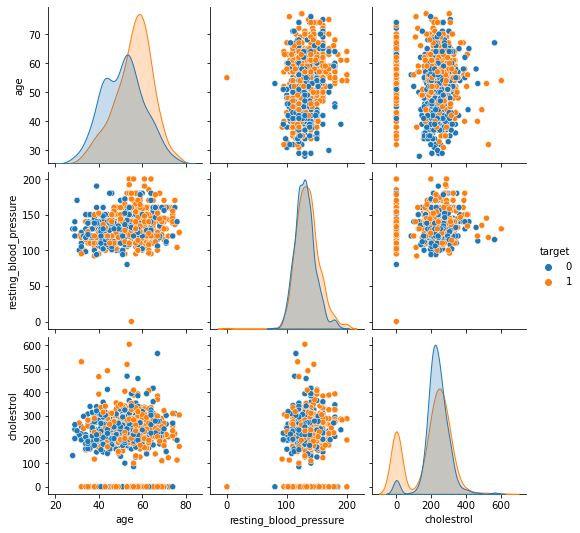

In [18]:
# distribution of Numerical features
sns.pairplot(dt,hue='target',vars=['age','resting_blood_pressure','cholestrol'])

In [ ]:
 # From the above plot its clear that as age increases chances of heart disease increase

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholestrol'>

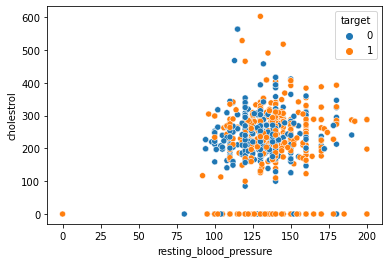

In [22]:
sns.scatterplot(x ='resting_blood_pressure', y='cholestrol', hue='target',data=dt)

In [ ]:
#from the above plot we see there are asome outliers present

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

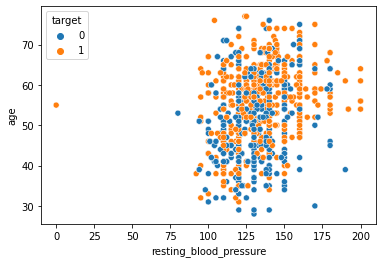

In [23]:
sns.scatterplot(x='resting_blood_pressure',y='age',hue='target',data=dt)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>,
        <AxesSubplot:title={'center':'cholestrol'}>],
       [<AxesSubplot:title={'center':'fasting_blood_dugar'}>,
        <AxesSubplot:title={'center':'max_heart_rate_achieved'}>,
        <AxesSubplot:title={'center':'exercise_induced_angina'}>],
       [<AxesSubplot:title={'center':'st_depression'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

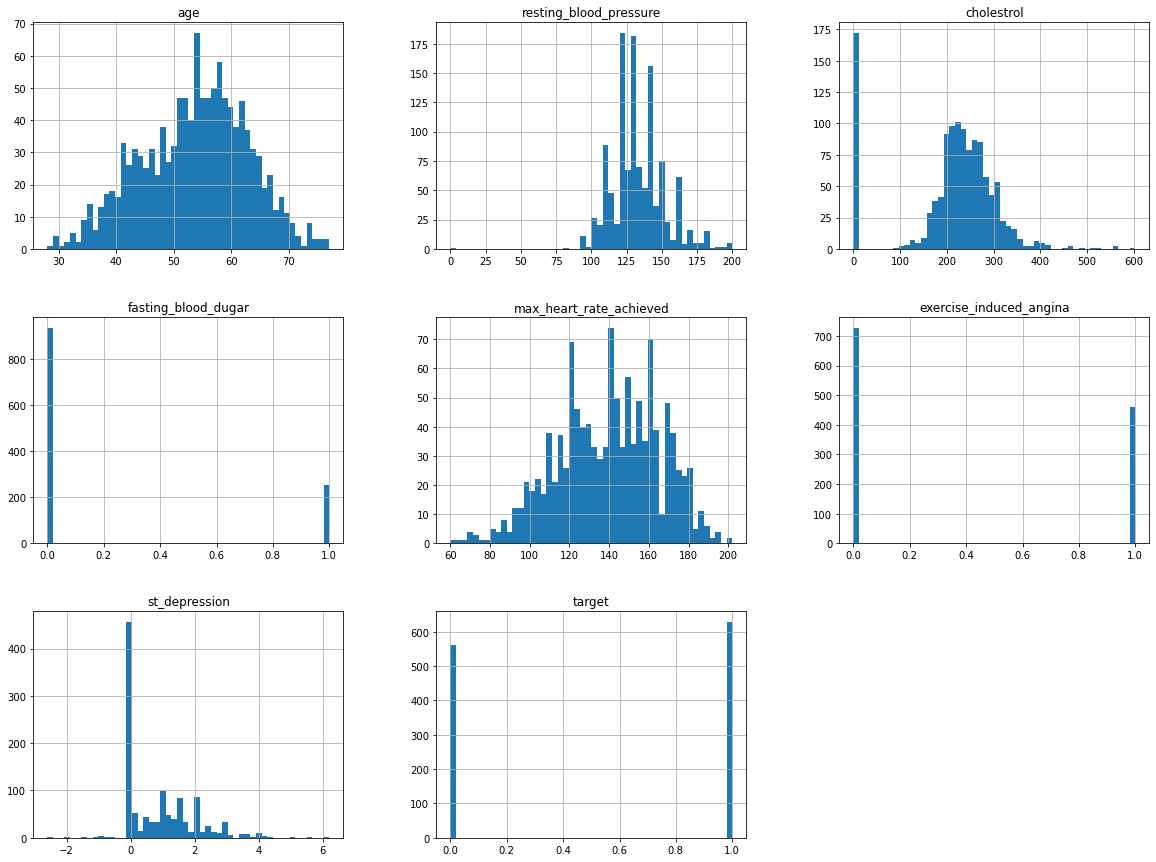

In [8]:
# Outlier Removal and Detection
# determong using the Z SCORE
dt.hist(bins=50,figsize=(20,15))

In [ ]:
# from the above   plots it can be seen there is some skewness in the data.In resting_blood_pressure there is hoigh right skewness.

In [ ]:
g=sns.FacetGrid(data=(pd.melt(dt)),col='variable',row='value')
g.map(sns.scatterplot,'variable','value')

In [ ]:
pdd=pd.melt(dt)

In [ ]:
g=sns.FacetGrid(pdd,row='variable',col='value',height=4)
g.map(plt.boxplot)

In [ ]:
g=sns.FacetGrid(pdd,row='variable',height=4)
g.map(plt.boxplot,'value')

In [ ]:
dt.boxplot(figsize=(20,15))

In [ ]:
from the above plot outliers are present. Many outliers are present in cholestrol

In [25]:
# Outlier removal
# Detecting outlier using Z score
# Filtering numeric features as age,restingbp,cholestrol and max heart rate achieved has otlier per EDA
dt_numeric=dt[["age",'resting_blood_pressure','cholestrol','max_heart_rate_achieved']]

In [26]:
dt_numeric.head()

,age,resting_blood_pressure,cholestrol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [28]:
# Calculating z score of numeric columns in the dataset
z=np.abs(stats.zscore(dt_numeric))

NameError: name 'stats' is not defined

In [29]:
# Defining thereshold for filtering outliers
threshold=3
print(np.where(z>3))

NameError: name 'z' is not defined